In [4]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import HTML
from matplotlib import animation, rc

font = {'size': 14}

rc('text', usetex=True)
rc('font', **font)

In [5]:
p0 = 0.7E6
F = 0.15
c0 = 1614
r0 = 0.042
f0 = 1.7E6
w0 = 2*np.pi*f0
z = np.linspace(0, 1.5*F, 100)
r = np.linspace(-r0, r0, 100000)

Z, R = np.meshgrid(z, r)

# Focused transducer

In [38]:
def piston_radiator(tau):
    p = p0*np.sin(w0*(tau + r**2/2/c0/F))
    return p

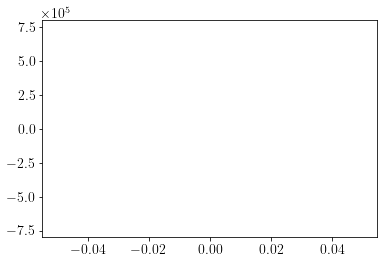

In [42]:
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
plt.ylim([-0.8E6, 0.8E6])
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

In [44]:
def init():
    line.set_data([], [])
    return line,

def animate(i):
    pdata = piston_radiator(i/10/f0)
    line.set_data(r, pdata)
    return line,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=500, interval=200, blit=True)

HTML(ani.to_html5_video())

# ani.save('piston_radiator.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

# Plane wave

In [6]:
def plane_wave(tau):
    p = p0*np.sin(w0*tau)
    return p

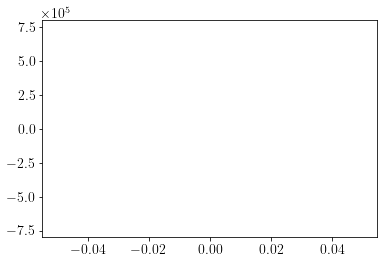

In [7]:
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
plt.ylim([-0.8E6, 0.8E6])
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

In [9]:
def init():
    line.set_data([], [])
    return line,

def animate(i):
    pdata = plane_wave(i/10/f0)
    line.set_data(r, pdata)
    return line,

ani_plane = animation.FuncAnimation(fig, animate, init_func=init, frames=500, interval=200, blit=True)

HTML(ani_plane.to_html5_video())

# ani_plane.save('plane_wave.mp4', fps=10, extra_args=['-vcodec', 'libx264'])